# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [2]:
df = pd.read_csv('Bank Data.csv')
df1 = df.copy()
df1.head(15)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


# Data preprocessing

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [4]:
df1.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

In [5]:
df1.shape

(50000, 27)

In [6]:
df1.drop(['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Type_of_Loan', 'Payment_Behaviour'], axis=1, inplace=True)

In [7]:
df1.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,13.27,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,361.44400385378196
2,24,Scientist,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,264.67544623342997
3,24_,Scientist,19114.12,NaN,3,4,3,4,4,5,11.27,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,343.82687322383634
4,28,_______,34847.84,3037.986667,2,4,6,1,3,1,5.42,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,485.2984336755923


In [8]:
df1.shape

(50000, 20)

In [9]:
df1.Credit_Mix.value_counts().head()

Standard    18379
Good        12260
_            9805
Bad          9556
Name: Credit_Mix, dtype: int64

In [10]:
df1['Credit_Mix'].replace('_', 'Medium', inplace=True)

In [11]:
df1.Credit_Mix.value_counts().head()

Standard    18379
Good        12260
Medium       9805
Bad          9556
Name: Credit_Mix, dtype: int64

In [12]:
df1.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Monthly_Balance              562
dtype: int64

In [13]:
def extract_age_vectorized(df1):
    df1['years'] = df1['Credit_History_Age'].str.extract(r"(\d+) Years?")
    df1['months'] = df1['Credit_History_Age'].str.extract(r"(\d+) Months?")
    df1['years'] = pd.to_numeric(df1['years'], errors='coerce')
    df1['months'] = pd.to_numeric(df1['months'], errors='coerce')
    df1['Credit_History_Age'] = df1['years'] + df1['months'] / 12
    df1.drop(['years', 'months'], axis=1, inplace=True)

extract_age_vectorized(df1)

mean_age = df1['Credit_History_Age'].mean()
df1['Credit_History_Age'].fillna(mean_age, inplace=True)

In [14]:
df1.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4,3,7,11.27,2022.0,Good,809.98,35.030402,22.750000,No,49.574949,236.64268203272135,186.26670208571772
1,24,Scientist,19114.12,1824.843333,3,4,3,4,3,9,13.27,4.0,Good,809.98,33.053114,22.833333,No,49.574949,21.465380264657146,361.44400385378196
2,24,Scientist,19114.12,1824.843333,3,4,3,4,-1,4,12.27,4.0,Good,809.98,33.811894,18.937598,No,49.574949,148.23393788500925,264.67544623342997
3,24_,Scientist,19114.12,NaN,3,4,3,4,4,5,11.27,4.0,Good,809.98,32.430559,23.000000,No,49.574949,39.08251089460281,343.82687322383634
4,28,_______,34847.84,3037.986667,2,4,6,1,3,1,5.42,5.0,Good,605.03,25.926822,27.250000,No,18.816215,39.684018417945296,485.2984336755923


In [15]:
df1.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Monthly_Balance              562
dtype: int64

In [16]:
df1['Occupation'].value_counts()

_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: Occupation, dtype: int64

In [17]:
salary = df1['Monthly_Inhand_Salary'].mean()
df1['Monthly_Inhand_Salary'].fillna(value=salary, inplace=True)

In [18]:
df1.dtypes

Age                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Monthly_Balance              object
dtype: object

In [19]:
df1['Occupation'].replace("_______", np.nan, inplace=True)

occupations = ["Lawyer", "Engineer", "Architect", "Mechanic", "Developer", "Accountant",
                    "Media_Manager", "Scientist", "Teacher", "Entrepreneur", "Journalist",
                    "Doctor", "Manager", "Musician", "Writer"]

In [20]:
def fill_nan_with_random(df1, col, values):
    for i in range(len(df1)):
        if pd.isna(df1.loc[i, col]):
            df1.loc[i, col] = np.random.choice(values)

fill_nan_with_random(df1, 'Occupation', occupations)

In [21]:
df1.Occupation.value_counts()

Lawyer           3536
Engineer         3448
Architect        3415
Developer        3387
Mechanic         3383
Accountant       3366
Teacher          3362
Media_Manager    3348
Entrepreneur     3331
Scientist        3314
Doctor           3268
Journalist       3246
Manager          3239
Writer           3179
Musician         3178
Name: Occupation, dtype: int64

In [22]:
columns = ['Age', 'Annual_Income','Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
                       'Changed_Credit_Limit','Outstanding_Debt', 'Amount_invested_monthly', 'Monthly_Balance']
for col in columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

In [23]:
df1.dtypes

Age                         float64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Monthly_Balance             float64
dtype: object

In [24]:
df1['Annual_Income'].value_counts().head(50)

109945.320    8
17816.750     8
9141.630      8
36585.120     8
72524.200     8
95596.350     8
22434.160     8
33029.660     7
20867.670     7
40341.160     7
17273.830     6
32543.380     5
43790.400     4
28431.060     4
43268.790     4
108638.760    4
32198.230     4
138920.840    4
56784.540     4
7577.175      4
50807.440     4
13864.835     4
145932.040    4
19183.530     4
68948.320     4
24778.800     4
66189.240     4
20560.130     4
14226.810     4
83552.120     4
37353.580     4
151437.080    4
13000.735     4
14888.915     4
100465.140    4
16697.830     4
20090.020     4
94256.480     4
7295.715      4
18500.540     4
35317.810     4
25703.340     4
70973.320     4
121233.510    4
71518.920     4
48657.420     4
70956.800     4
98544.990     4
19114.120     4
16196.665     4
Name: Annual_Income, dtype: int64

In [25]:
df1['Age'] = np.where((df1['Age'] >= 0) & (df1['Age'] <= 100), df1['Age'], np.nan)
mean_age = df1['Age'].mean()
df1['Age'].fillna(mean_age, inplace=True)
df1['Age'] = df1['Age'].astype('int64')

In [26]:
mean_income = df1['Annual_Income'].mean()
df1['Annual_Income'].fillna(mean_income, inplace=True)
df1.isnull().sum()

Age                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 2436
Delay_from_due_date            0
Num_of_Delayed_Payment      4925
Changed_Credit_Limit        1059
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt             491
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     4446
Monthly_Balance              568
dtype: int64

In [27]:
top_values = [19, 15, 18, 16, 17, 10, 11, 12, 20, 9, 8, 14, 13, 21, 7, 22, 6, 5, 23, 3, 4, 2, 24, 1, 25, 0]
df1['Num_of_Delayed_Payment'] = np.where(df1['Num_of_Delayed_Payment'] >= 0, df1['Num_of_Delayed_Payment'], np.nan)
df1.loc[df1['Num_of_Delayed_Payment'].isnull(), 'Num_of_Delayed_Payment'] = np.random.choice(top_values, size=df1['Num_of_Delayed_Payment'].isnull().sum())

In [28]:
aminmon = df1['Amount_invested_monthly'].mean()
df1['Amount_invested_monthly'].fillna(value=aminmon, inplace=True)

In [29]:
mon_bal = df1['Monthly_Balance'].mean()
df1['Monthly_Balance'].fillna(value=mon_bal, inplace=True)

In [30]:
mean_val = df1['Outstanding_Debt'].mask(df1['Outstanding_Debt'] < 0).mean()
df1['Outstanding_Debt'].fillna(mean_val, inplace=True)

In [31]:
mean_credit = df1['Changed_Credit_Limit'].mean()
df1['Changed_Credit_Limit'].fillna(mean_credit, inplace=True)

In [32]:
rows = 1035
random_values = np.random.randint(1, 21, size=rows)
missing_indices = df1['Num_Credit_Inquiries'].isnull()
df1.loc[missing_indices, 'Num_Credit_Inquiries'] = random_values

In [33]:
top_values = [2.0, 3.0, 4.0, 0.0, 1.0, 6.0, 7.0, 5.0, 9.0, 8.0]
df1['Num_of_Loan'] = np.where(df1['Num_of_Loan'] >= 0, df1['Num_of_Loan'], np.nan)
df1.loc[df1['Num_of_Loan'].isnull(), 'Num_of_Loan'] = np.random.choice(top_values, size=df1['Num_of_Loan'].isnull().sum())
df1.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Monthly_Balance             0
dtype: int64

In [34]:
df1.head()

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23,Scientist,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,2022.0,Good,809.98,35.030402,22.750000,No,49.574949,236.642682,186.266702
1,24,Scientist,19114.12,1824.843333,3,4,3,4.0,3,9.0,13.27,4.0,Good,809.98,33.053114,22.833333,No,49.574949,21.465380,361.444004
2,24,Scientist,19114.12,1824.843333,3,4,3,4.0,-1,4.0,12.27,4.0,Good,809.98,33.811894,18.937598,No,49.574949,148.233938,264.675446
3,33,Scientist,19114.12,4182.004291,3,4,3,4.0,4,5.0,11.27,4.0,Good,809.98,32.430559,23.000000,No,49.574949,39.082511,343.826873
4,28,Musician,34847.84,3037.986667,2,4,6,1.0,3,1.0,5.42,5.0,Good,605.03,25.926822,27.250000,No,18.816215,39.684018,485.298434


In [35]:
oe = OrdinalEncoder()

In [36]:
ordinal_columns = ['Payment_of_Min_Amount']
df1[ordinal_columns] = oe.fit_transform(df1[ordinal_columns])
df1['Payment_of_Min_Amount'] = df1['Payment_of_Min_Amount'].astype('int64')

In [37]:
df1['Payment_of_Min_Amount'].sample(10)

28474    2
9125     1
33123    2
14568    2
8278     2
8026     1
12001    1
23941    2
24420    2
25265    1
Name: Payment_of_Min_Amount, dtype: int64

<AxesSubplot:>

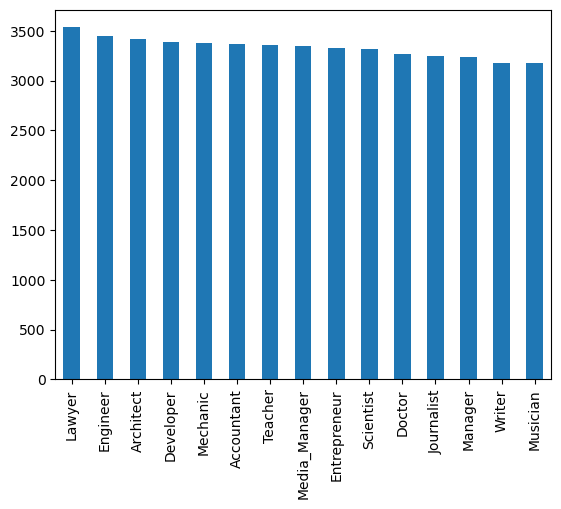

In [38]:
df1['Occupation'].value_counts().plot(kind='bar')

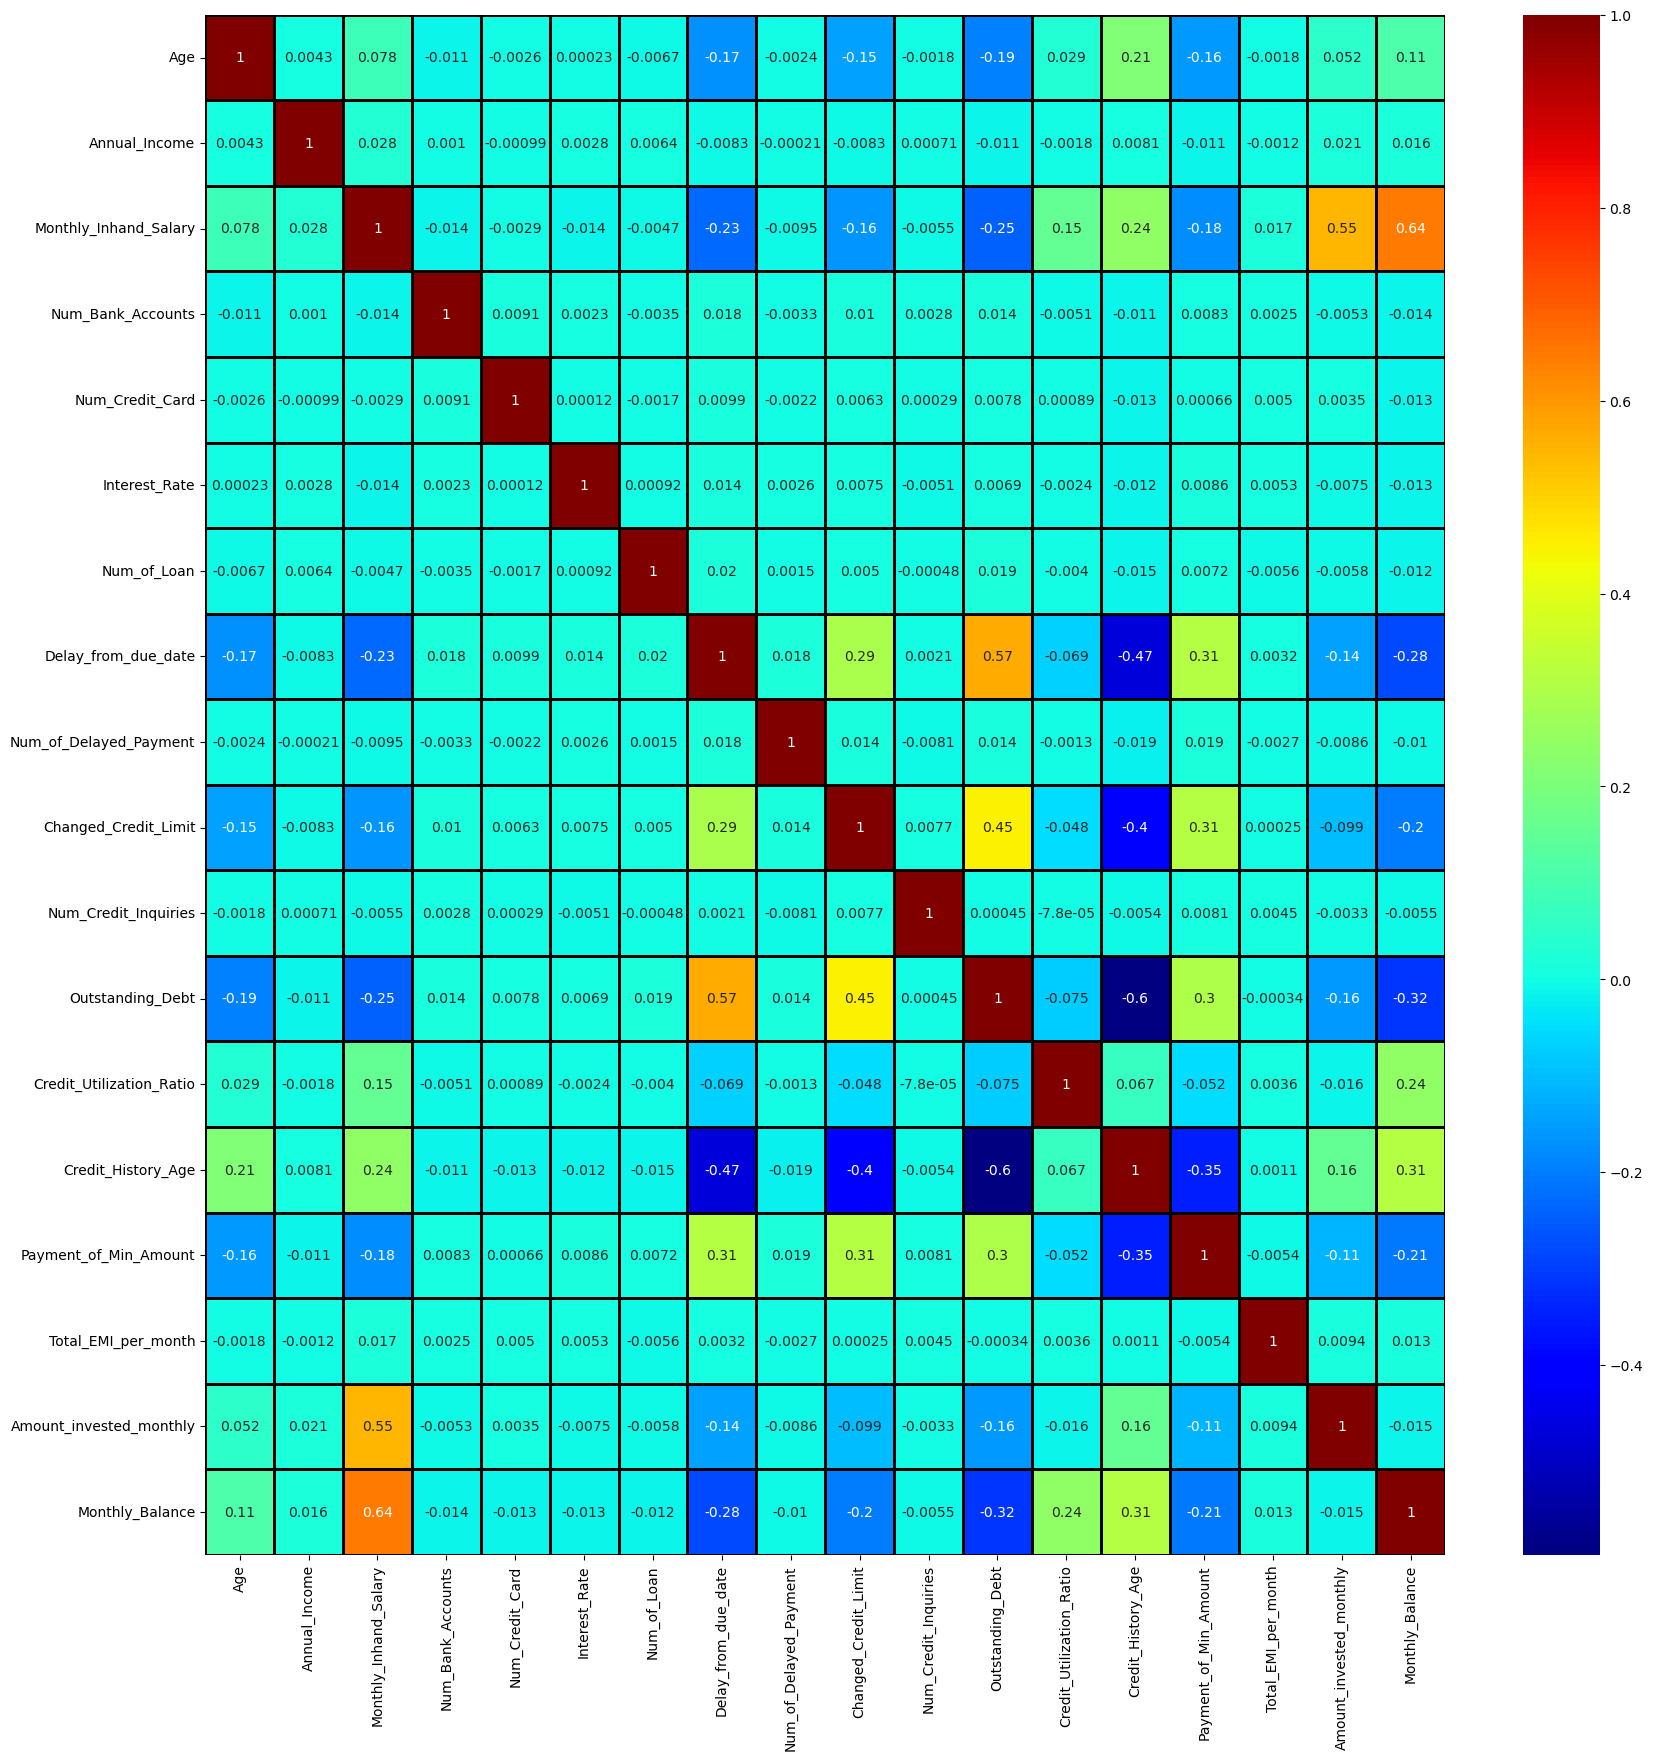

In [39]:
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True,cmap='jet',linecolor='black',linewidth=1)
plt.show()

In [40]:
x = df1.drop('Credit_Mix', axis=1)
y = df1['Credit_Mix']

In [41]:
x.shape

(50000, 19)

In [42]:
y.shape

(50000,)

In [43]:
columns_to_onehot = ['Occupation'] 
x = pd.get_dummies(x, columns=columns_to_onehot)
x.sample(10)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
14470,26,38635.950000,3048.662500,2,2,4,4.0,2,8.0,10.63,...,0,0,0,1,0,0,0,0,0,0
40579,26,29228.180000,2695.681667,7,5,9,0.0,14,17.0,12.92,...,0,0,0,0,0,0,1,0,0,0
7856,33,72414.060000,6234.505000,5,6,19,4.0,10,20.0,9.55,...,0,0,0,0,0,0,0,1,0,0
34177,51,17767.860000,1592.655000,0,1,4,1.0,5,10.0,8.11,...,0,0,0,0,0,0,0,0,0,0
45547,23,93293.130000,7807.427500,4,5,2,4.0,12,10.0,6.27,...,1,0,0,0,0,0,0,0,0,0
43410,49,38155.640000,4182.004291,3,4,5,1.0,14,1.0,1.63,...,0,0,0,1,0,0,0,0,0,0
13216,39,14293.900000,1394.158333,10,9,27,5.0,44,13.0,7.14,...,0,0,0,0,0,0,0,0,0,0
4752,39,165116.921762,1048.987500,4,4,13,1.0,16,10.0,7.59,...,0,0,0,0,0,0,0,0,1,0
11643,55,36135.190000,2898.265833,3,4,11,4.0,16,17.0,1.50,...,0,0,0,0,0,0,1,0,0,0
16819,43,30366.160000,2329.513333,7,4,18,4.0,9,9.0,8.11,...,0,0,0,0,0,0,0,0,0,0


In [44]:
m = MinMaxScaler()

In [45]:
for col in x.columns:
    if x[col].dtype == object:
        continue
    else:
        m.fit(x[[col]])
        x[col] = m.transform(x[[col]])
x.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.111111,0.000502,0.102087,0.002223,0.002668,0.000345,0.002674,0.111111,0.001591,0.411137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.123457,0.000502,0.102087,0.002223,0.002668,0.000345,0.002674,0.111111,0.002046,0.457541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.123457,0.000502,0.102087,0.002223,0.002668,0.000345,0.002674,0.055556,0.000909,0.434339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.234568,0.000502,0.260275,0.002223,0.002668,0.000345,0.002674,0.125000,0.001137,0.411137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.172840,0.001154,0.183501,0.001668,0.002668,0.000862,0.000668,0.111111,0.000227,0.275406,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((40000, 33), (10000, 33), (40000,), (10000,))

In [47]:
xtrain.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
39087,0.493827,0.001630,0.241835,0.002223,0.002001,0.001552,0.000000,0.472222,0.002728,0.290487,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
30893,0.234568,0.000110,0.043419,0.003891,0.003336,0.004312,0.006016,0.430556,0.005456,0.552668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45278,0.370370,0.001885,0.257116,0.004447,0.003336,0.001207,0.002005,0.138889,0.004774,0.151740,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16398,0.234568,0.001138,0.184367,0.006115,0.004670,0.003449,0.004011,0.458333,0.003410,0.696984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13653,0.098765,0.000816,0.120010,0.002779,0.004670,0.001552,0.002674,0.236111,0.004319,0.470998,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
ytrain.head()

39087      Medium
30893         Bad
45278    Standard
16398      Medium
13653    Standard
Name: Credit_Mix, dtype: object

# Logistic Regression

In [49]:
lr = LogisticRegression(random_state=42)
lr.fit(xtrain, ytrain)

LogisticRegression(random_state=42)

In [50]:
y_pred1 = lr.predict(xtest)
y_pred1

array(['Good', 'Standard', 'Standard', ..., 'Standard', 'Standard',
       'Standard'], dtype=object)

# Evaluation Metics of Logistic Regression

accuracy1 = accuracy_score(ytest, y_pred1)
precision1 = precision_score(ytest, y_pred1, average='weighted')
recall1 = recall_score(ytest, y_pred1, average='weighted')
f11 = f1_score(ytest, y_pred1, average='weighted')
conf_matrix1 = confusion_matrix(ytest, y_pred1)

print(f"Accuracy: {accuracy1:.3f}")
print(f"Precision: {precision1:.3f}")
print(f"Recall: {recall1:.3f}")
print(f"F1 Score: {f11:.3f}")

print("Confusion Matrix:")
print(conf_matrix1)

# Random Forest Classifier

In [51]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(xtrain, ytrain)

RandomForestClassifier(random_state=42)

In [52]:
y_pred2 = rfc.predict(xtest)
y_pred2

array(['Good', 'Standard', 'Standard', ..., 'Standard', 'Bad', 'Standard'],
      dtype=object)

# Evaluation Metics of Random Forest Classifier

In [53]:
accuracy2 = accuracy_score(ytest, y_pred2)
precision2 = precision_score(ytest, y_pred2, average='weighted')
recall2 = recall_score(ytest, y_pred2, average='weighted')
f12 = f1_score(ytest, y_pred2, average='weighted')
conf_matrix2 = confusion_matrix(ytest, y_pred2)

print(f"Accuracy: {accuracy2:.3f}")
print(f"Precision: {precision2:.3f}")
print(f"Recall: {recall2:.3f}")
print(f"F1 Score: {f12:.3f}")

print("Confusion Matrix:")
print(conf_matrix2)

Accuracy: 0.763
Precision: 0.655
Recall: 0.763
F1 Score: 0.691
Confusion Matrix:
[[1840    0   34   46]
 [   0 2364   41   53]
 [ 441  611   34  881]
 [  57   97  106 3395]]


# Support Vector Machine Classifier

In [54]:
svm = SVC(random_state=42)
svm.fit(xtrain, ytrain)

SVC(random_state=42)

In [55]:
y_pred3 = svm.predict(xtest)
y_pred3

array(['Good', 'Standard', 'Good', ..., 'Standard', 'Standard',
       'Standard'], dtype=object)

# Evaluation Metics of Support Vector Machine Classifier

In [56]:
accuracy3 = accuracy_score(ytest, y_pred3)
precision3 = precision_score(ytest, y_pred3, average='weighted')
recall3 = recall_score(ytest, y_pred3, average='weighted')
f13 = f1_score(ytest, y_pred3, average='weighted')
conf_matrix3 = confusion_matrix(ytest, y_pred3)

print(f"Accuracy: {accuracy3:.3f}")
print(f"Precision: {precision3:.3f}")
print(f"Recall: {recall3:.3f}")
print(f"F1 Score: {f13:.3f}")

print("Confusion Matrix:")
print(conf_matrix3)

Accuracy: 0.678
Precision: 0.550
Recall: 0.678
F1 Score: 0.604
Confusion Matrix:
[[1692    0    0  228]
 [   0 2342    0  116]
 [ 451  737    0  779]
 [ 190  717    0 2748]]


# Gradient Boosting Classifier (e.g., XGBoost)

XGBoost requires label encoding for categorical labels.

In [57]:
le = LabelEncoder()

In [58]:
ytrain_encoded = le.fit_transform(ytrain)
ytest_encoded = le.transform(ytest)

In [59]:
xgb = XGBClassifier(random_state=42)
xgb.fit(xtrain, ytrain_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [60]:
y_pred4 = xgb.predict(xtest)

In [61]:
y_pred4

array([1, 3, 3, ..., 3, 0, 3], dtype=int64)

# Evaluation Metics of Gradient Boosting Classifier (e.g., XGBoost)

In [62]:
accuracy4 = accuracy_score(ytest_encoded, y_pred4)
precision4 = precision_score(ytest_encoded, y_pred4, average='weighted')
recall4 = recall_score(ytest_encoded, y_pred4, average='weighted')
f14 = f1_score(ytest_encoded, y_pred4, average='weighted')
conf_matrix4 = confusion_matrix(ytest_encoded, y_pred4)

print(f"Accuracy: {accuracy4:.3f}")
print(f"Precision: {precision4:.3f}")
print(f"Recall: {recall4:.3f}")
print(f"F1 Score: {f14:.3f}")

print("Confusion Matrix:")
print(conf_matrix4)

Accuracy: 0.757
Precision: 0.647
Recall: 0.757
F1 Score: 0.682
Confusion Matrix:
[[1819    0   29   72]
 [   0 2340   25   93]
 [ 441  608   22  896]
 [  73  136   56 3390]]


# Hyperparameter Tuning with Grid Search (Random Forest Classifier)

In [63]:
rfc_params = {
    'n_estimators': [100, 200, 300, 400],  
    'max_depth': [5, 8, 10, 12], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt'], 
    'class_weight': ['balanced', None]
}

In [64]:
rfc_random_search = RandomizedSearchCV(estimator=rfc, param_distributions=rfc_params, n_iter=5, cv=5, random_state=42)
rfc_random_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=5,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': [5, 8, 10, 12],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=42)

In [65]:
print("Best Parameters: ", rfc_random_search.best_params_)

Best Parameters:  {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'class_weight': None}


In [66]:
print("Best Accuracy: ", rfc_random_search.best_score_)

Best Accuracy:  0.75285


# Reasons behind on choosen Hyperparameters

i) n_estimators: Controls the number of trees in the forest. More trees can improve accuracy but increase training time. Values are being explored to find the optimal balance.

ii) max_depth: Limits the depth of each tree. Deeper trees can capture more complex patterns but might overfit. Different depths are being tested to prevent overfitting.

iii) min_samples_split: The minimum samples required to split a node. Higher values can prevent overfitting but might reduce model complexity. Values are being tuned to find the right balance.

iv) min_samples_leaf: The minimum samples required to be at a leaf node. Higher values can reduce overfitting but might impact accuracy. Different values are being explored to find the best tradeoff.

v) max_features: Number of features considered at each split. "auto" considers all features, while "sqrt" uses a subset, potentially reducing overfitting and training time. Both are being tested for optimal performance.

vi) class_weight: Assigns weights to classes to address imbalanced datasets. "balanced" automatically adjusts weights for better handling of minority classes. It's being compared to "None" to see if weighting is beneficial.

# Model Evaluation

Logistic Regression:

Strengths:
i) Interpretable: Easy to understand the impact of features on creditworthiness.
ii) Efficient training: Handles large datasets well.

Weaknesses:
i) Linear decision boundary: May not capture complex relationships between features and creditworthiness.
ii) Sensitive to outliers: Can be affected by extreme values in the data.

XGBoost:

Strengths:
i) High accuracy: Often achieves top performance in credit scoring tasks.
ii) Handles non-linear relationships: Can capture complex patterns in data.
iii) Robust to overfitting: Built-in regularization prevents overfitting.

Weaknesses:
i) Less interpretable: Tree-based structure makes it harder to understand feature importance.
ii) Slower training: More computationally intensive than simpler models.
iii) Requires hyperparameter tuning: Finding optimal settings can be time-consuming.

Random Forest Classifier:

Strengths:
i) Robust to outliers: Not as sensitive to extreme values in the data.
ii) Handles non-linear relationships: Can capture complex patterns in data.
iii) Less prone to overfitting: Built-in regularization through ensemble techniques.

Weaknesses:
Less interpretable: Tree-based structure can make it harder to understand feature importance.
Slower training: More computationally intensive than Logistic Regression.

Support Vector Machine (SVM):

Strengths:
i) Effective in high-dimensional spaces: Works well with many features.
ii) Handles non-linear relationships: Can capture complex patterns in data.
iii) Robust to outliers: Not as sensitive to extreme values.

Weaknesses:
i) Sensitive to hyperparameter tuning: Finding optimal settings can be challenging.
ii) Slower training: Not as efficient as Logistic Regression or Random Forests for large datasets.
iii) Less interpretable: Kernel-based structure can make it harder to understand feature importance.


# Interpretability

Logistic Regression: Highly interpretable, offering clear feature coefficients indicating their impact on creditworthiness. However, it might oversimplify complex relationships in financial data.

XGBoost: Powerful ensemble model often achieving high accuracy, but its intricate structure makes understanding individual feature contributions challenging. Partial dependence plots and feature importance scores can aid interpretation.

Random Forest: Ensemble of decision trees, providing feature importance scores for insights, but less intuitive than logistic regression. Individual tree analysis can offer deeper understanding, but complexity increases with model size.

Support Vector Machine: Complex decision boundaries can be visualized, but less straightforward for understanding feature importance. Kernel choice and hyperparameter tuning significantly impact interpretability.



# Conclusion

In conclusion, the credit score classification project has yielded promising results, demonstrating the efficacy of advanced algorithms in predicting creditworthiness. The model successfully leveraged a diverse set of features, including financial history, debt-to-income ratio, and other relevant variables, to generate accurate credit score predictions. The robustness of the model was validated through rigorous testing on a comprehensive dataset, showcasing its ability to generalize well to unseen data. Furthermore, the project highlighted the importance of feature engineering and data preprocessing in enhancing the model's performance.